In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Information Technology

In [2]:
GOOGL = pd.read_csv("data/GOOGL.csv",parse_dates=[0]).set_index("date")
AMZN = pd.read_csv("data/AMZN.csv",parse_dates=[0]).set_index("date") # Amazon
AAPL = pd.read_csv("data/AAPL.csv",parse_dates=[0]).set_index("date")
META = pd.read_csv("data/META.csv",parse_dates=[0]).set_index("date")
MSFT = pd.read_csv("data/MSFT.csv",parse_dates=[0]).set_index("date") # Microsoft

In [3]:
GOOGL.head()

,4. close,5. volume
date,,
2022-03-25,2833.46,1204457.0
2022-03-24,2831.44,1319828.0
2022-03-23,2765.51,1257670.0
2022-03-22,2797.36,1739455.0
2022-03-21,2722.03,1327701.0


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-03-25 to 2021-11-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   4. close   100 non-null    float64
 1   5. volume  100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


Note that the data types of close and volume are float with no null values

In [5]:
# Create a joint dataframe by concatenating both dataframes
jointCloseDF = pd.concat([GOOGL['4. close'], 
                          AMZN['4. close'], 
                          AAPL['4. close'], 
                          META['4. close'], 
                          MSFT['4. close']], axis = 1)
jointCloseDF.set_axis(['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT'], axis=1, inplace=True)
jointVolumeDF = pd.concat([GOOGL['5. volume'], 
                           AMZN['5. volume'], 
                           AAPL['5. volume'], 
                           META['5. volume'], 
                           MSFT['5. volume']], axis = 1)
jointVolumeDF.set_axis(['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT'], axis=1, inplace=True)

In [6]:
jointCloseDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-03-25 to 2021-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   100 non-null    float64
 1   AMZN    100 non-null    float64
 2   AAPL    100 non-null    float64
 3   META    100 non-null    float64
 4   MSFT    100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


Note that there are no null values in the data set

In [7]:
jointVolumeDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-03-25 to 2021-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   100 non-null    float64
 1   AMZN    100 non-null    float64
 2   AAPL    100 non-null    float64
 3   META    100 non-null    float64
 4   MSFT    100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


Note that there are no null values in the data set

## Closed Price

### Below we will plot the closing prices of all the companies in one graph. We will also show the lag-1 difference for each company, which is the difference between consecutive observations

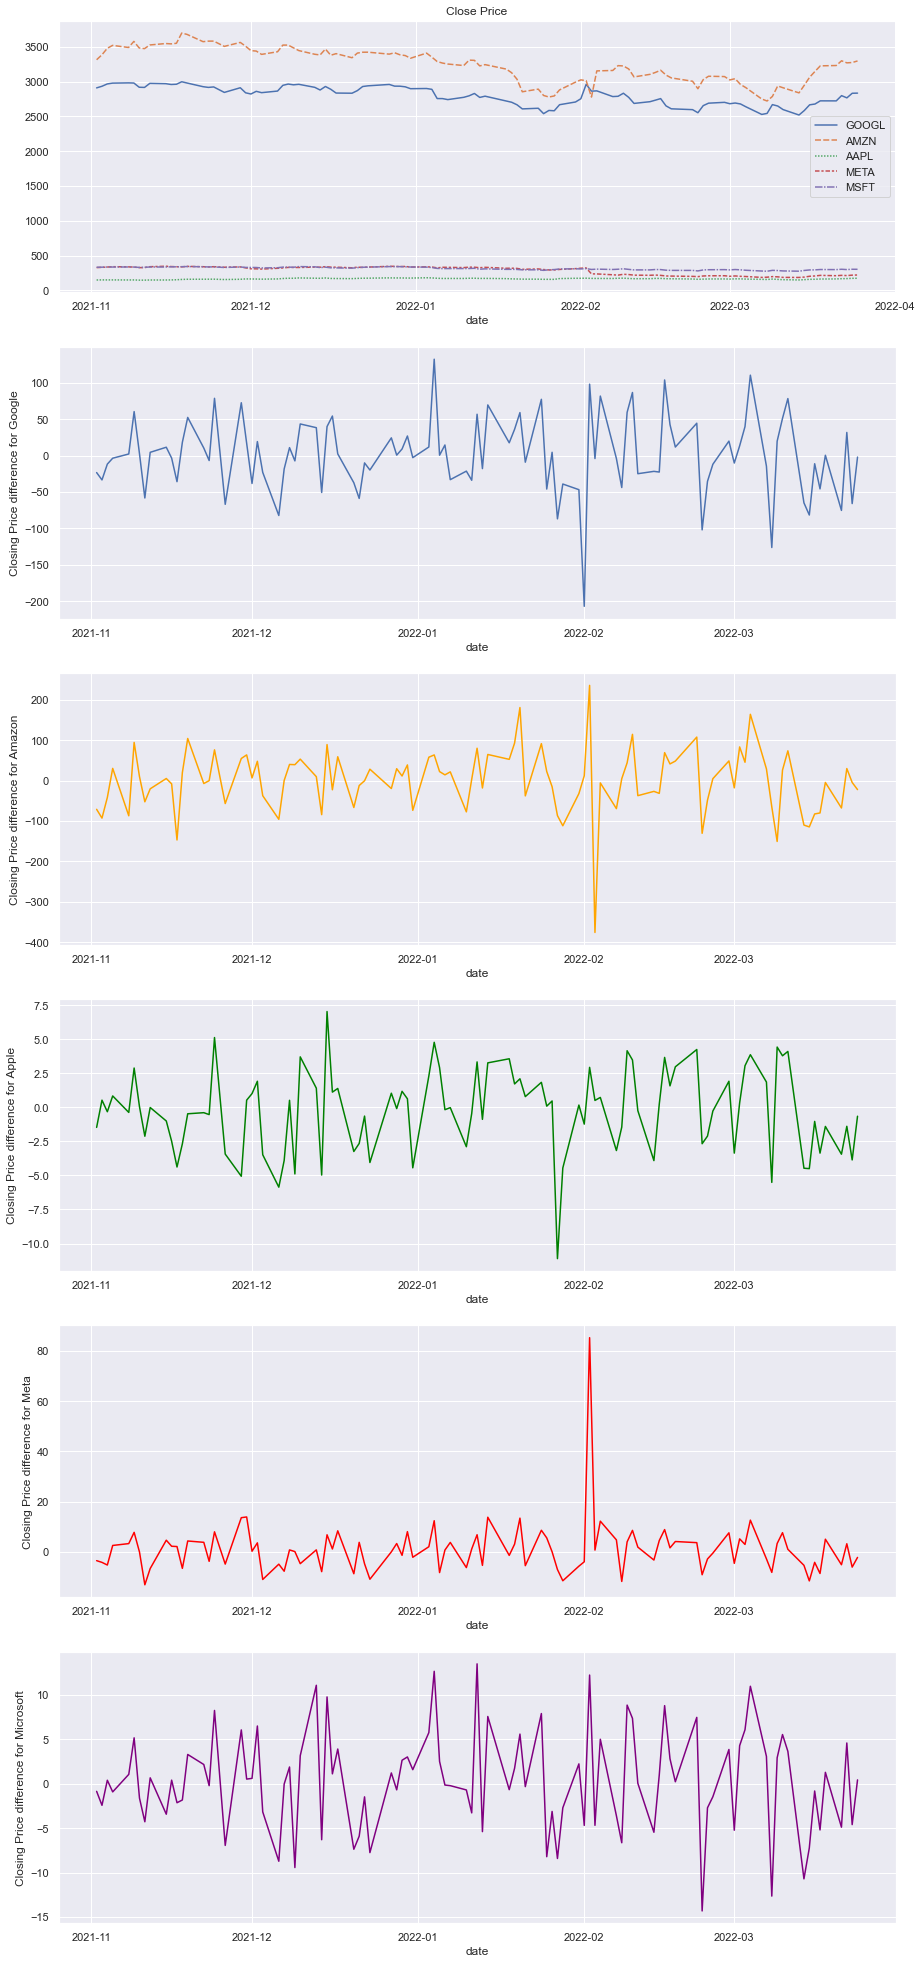

In [8]:
# Draw the distributions of all variables
f, axes = plt.subplots(6,figsize=(15, 35))

p1 = sb.lineplot(data=jointCloseDF, ax=axes[0])
p1.set_title("Close Price")


#For Google
copy=jointCloseDF.copy()
copy.drop(["AMZN","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[1].set_xlabel("date")
axes[1].set_ylabel("Closing Price difference for Google")
axes[1].plot(diff)


#For Amazon
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[2].set_xlabel("date")
axes[2].set_ylabel("Closing Price difference for Amazon")
axes[2].plot(diff,color = "orange")


#For Apple
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[3].set_xlabel("date")
axes[3].set_ylabel("Closing Price difference for Apple")
axes[3].plot(diff,color = "green")


#For Meta
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[4].set_xlabel("date")
axes[4].set_ylabel("Closing Price difference for Meta")
axes[4].plot(diff,color = "red")


#For Microsoft
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","META"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[5].set_xlabel("date")
axes[5].set_ylabel("Closing Price difference for Microsoft")
axes[5].plot(diff,color = "purple")


### Heatmap and correlation

          GOOGL      AMZN      AAPL      META      MSFT
GOOGL  1.000000  0.888846  0.115619  0.717484  0.930993
AMZN   0.888846  1.000000  0.008103  0.684495  0.897464
AAPL   0.115619  0.008103  1.000000  0.094570  0.080117
META   0.717484  0.684495  0.094570  1.000000  0.857109
MSFT   0.930993  0.897464  0.080117  0.857109  1.000000


<AxesSubplot:>

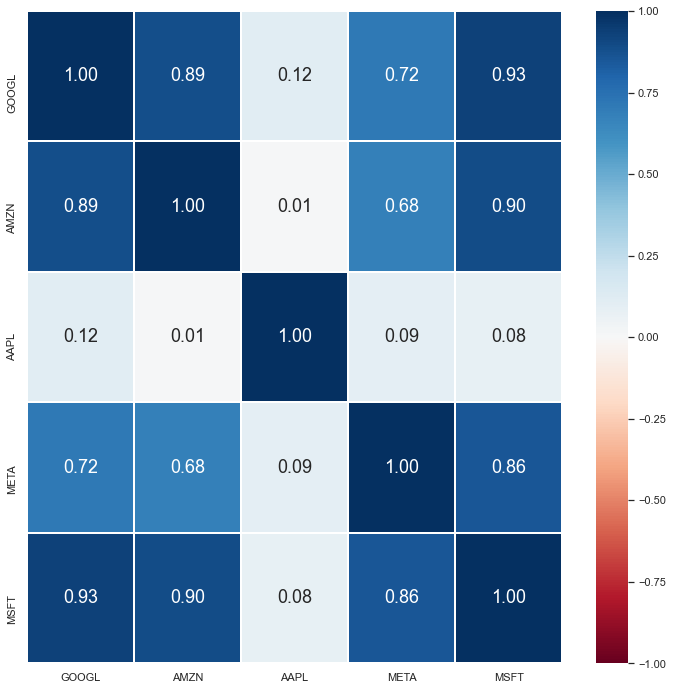

In [9]:
# Correlation Matrix
print(jointCloseDF.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointCloseDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As seen here, each stock have strong relationships with one another except for AAPL. </p>
besides from apple, the lowest correlation is 0.68 between amazon and meta, while the highest is 0.93 between google and microsoft. As such each stock close price, except for apple, can be used to predict another stock's closing price

In a prediction for Google close price, amazon and microsoft are important predictors, meta has medium importance, while apple is not that important</p>

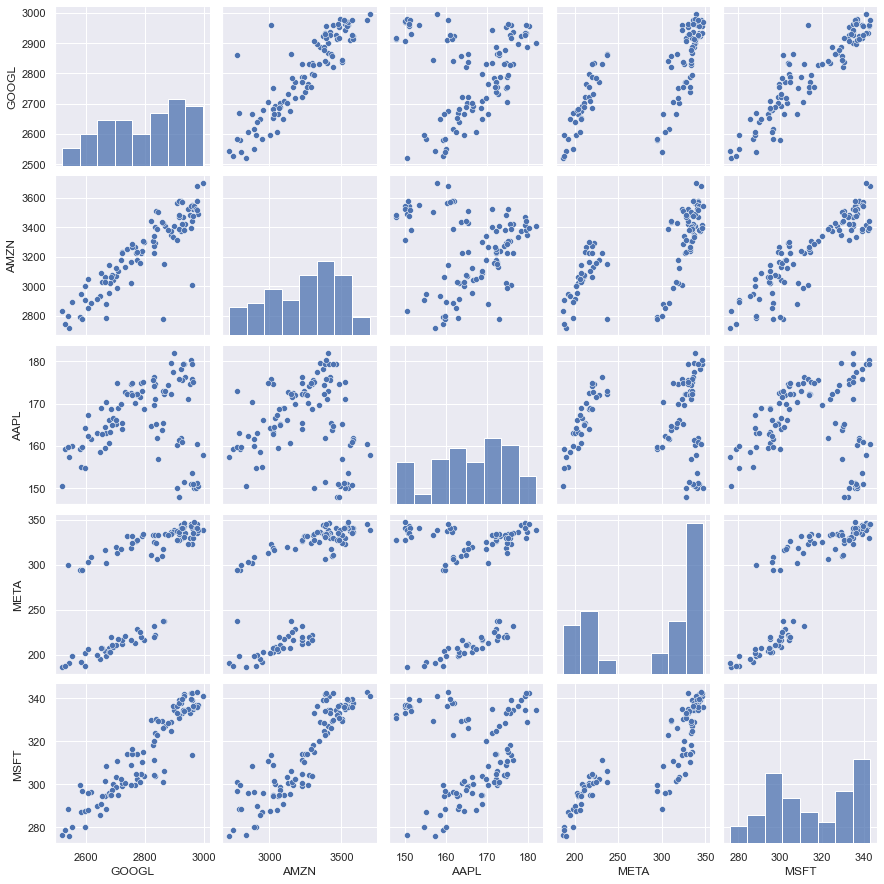

In [10]:
# Draw pairs of variables against one another
sb.pairplot(data = jointCloseDF)

The jointplot also supports the heatmap, as the strongest correlations between google with microsoft, and microsoft and amazon. The low apple correlation is seen as it is not linear. Lastly, the medium correlations between meta and amazon is not as clear but there is a visible trend

### For better visualization, we will normalize the data

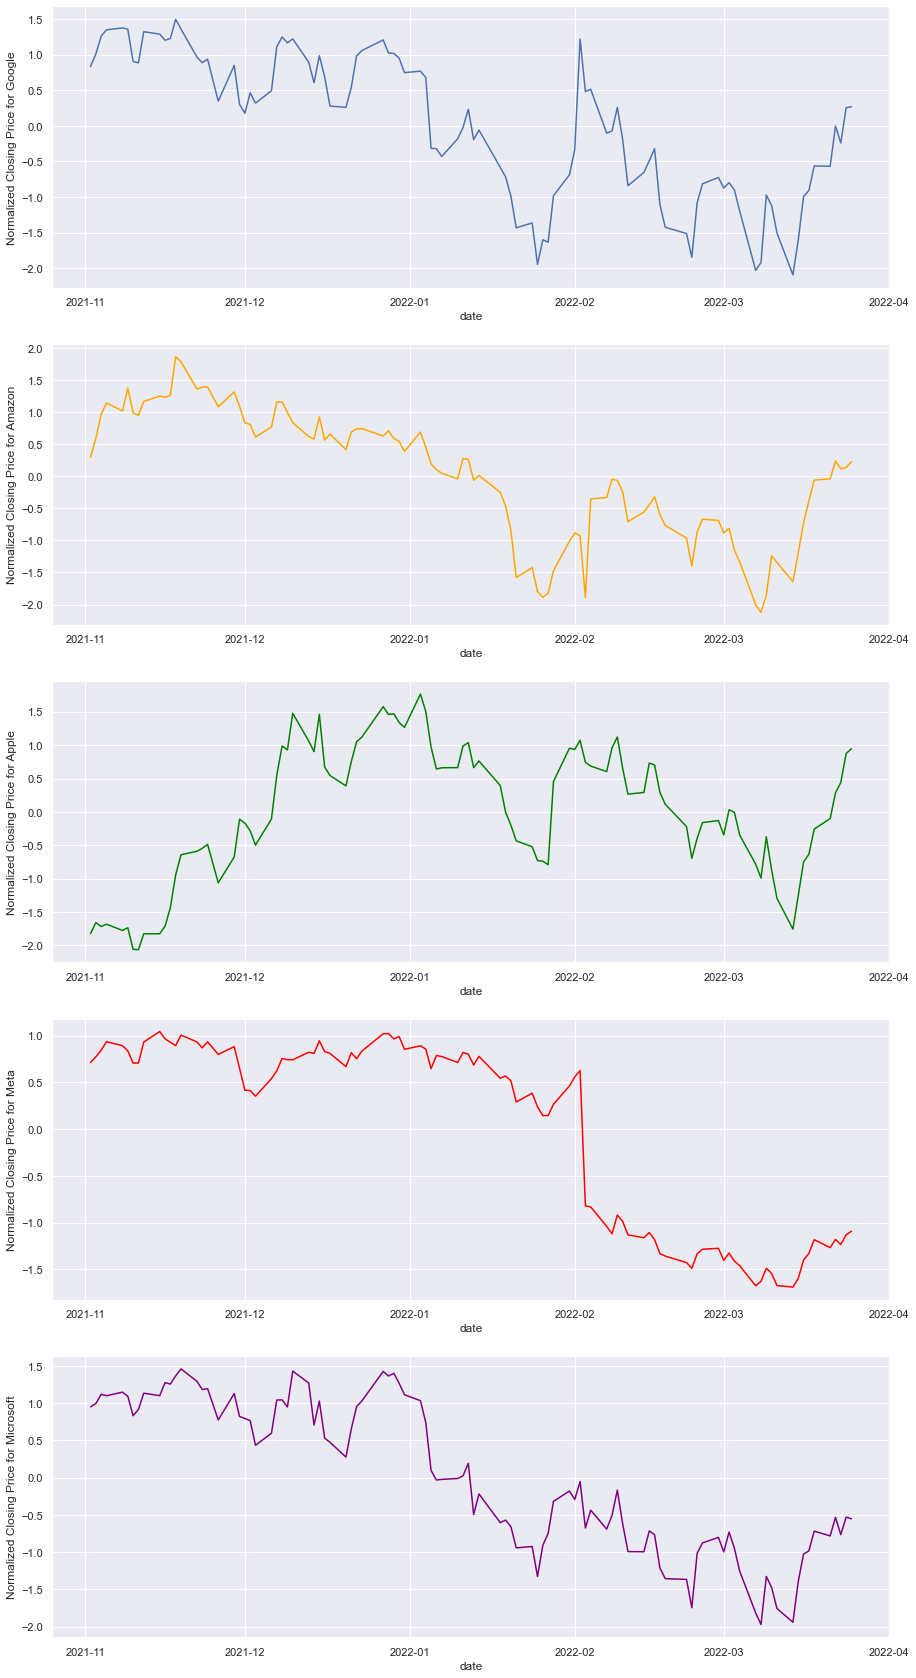

In [11]:
f, axes = plt.subplots(5,figsize=(15, 30))


#For Google
copy=jointCloseDF.copy()
copy.drop(["AMZN","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries2 = (series - avg) / dev
axes[0].set_xlabel("date")
axes[0].set_ylabel("Normalized Closing Price for Google")
axes[0].plot(closeSeries2)


#For Amazon
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries3 = (series - avg) / dev
axes[1].set_xlabel("date")
axes[1].set_ylabel("Normalized Closing Price for Amazon")
axes[1].plot(closeSeries3,color = "orange")


#For Apple
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries4 = (series - avg) / dev
axes[2].set_xlabel("date")
axes[2].set_ylabel("Normalized Closing Price for Apple")
axes[2].plot(closeSeries4,color = "green")


#For Meta
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries5 = (series - avg) / dev
axes[3].set_xlabel("date")
axes[3].set_ylabel("Normalized Closing Price for Meta")
axes[3].plot(closeSeries5,color = "red")


#For Microsoft
copy=jointCloseDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","META"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries6 = (series - avg) / dev
axes[4].set_xlabel("date")
axes[4].set_ylabel("Normalized Closing Price for Microsoft")
axes[4].plot(closeSeries6,color = "purple")

To remove the stationarity we will now take the lag-1 difference of the normalized closing price, note that the shape will be the same as the raw lag-1 difference, however this one is centered around zero at all times.

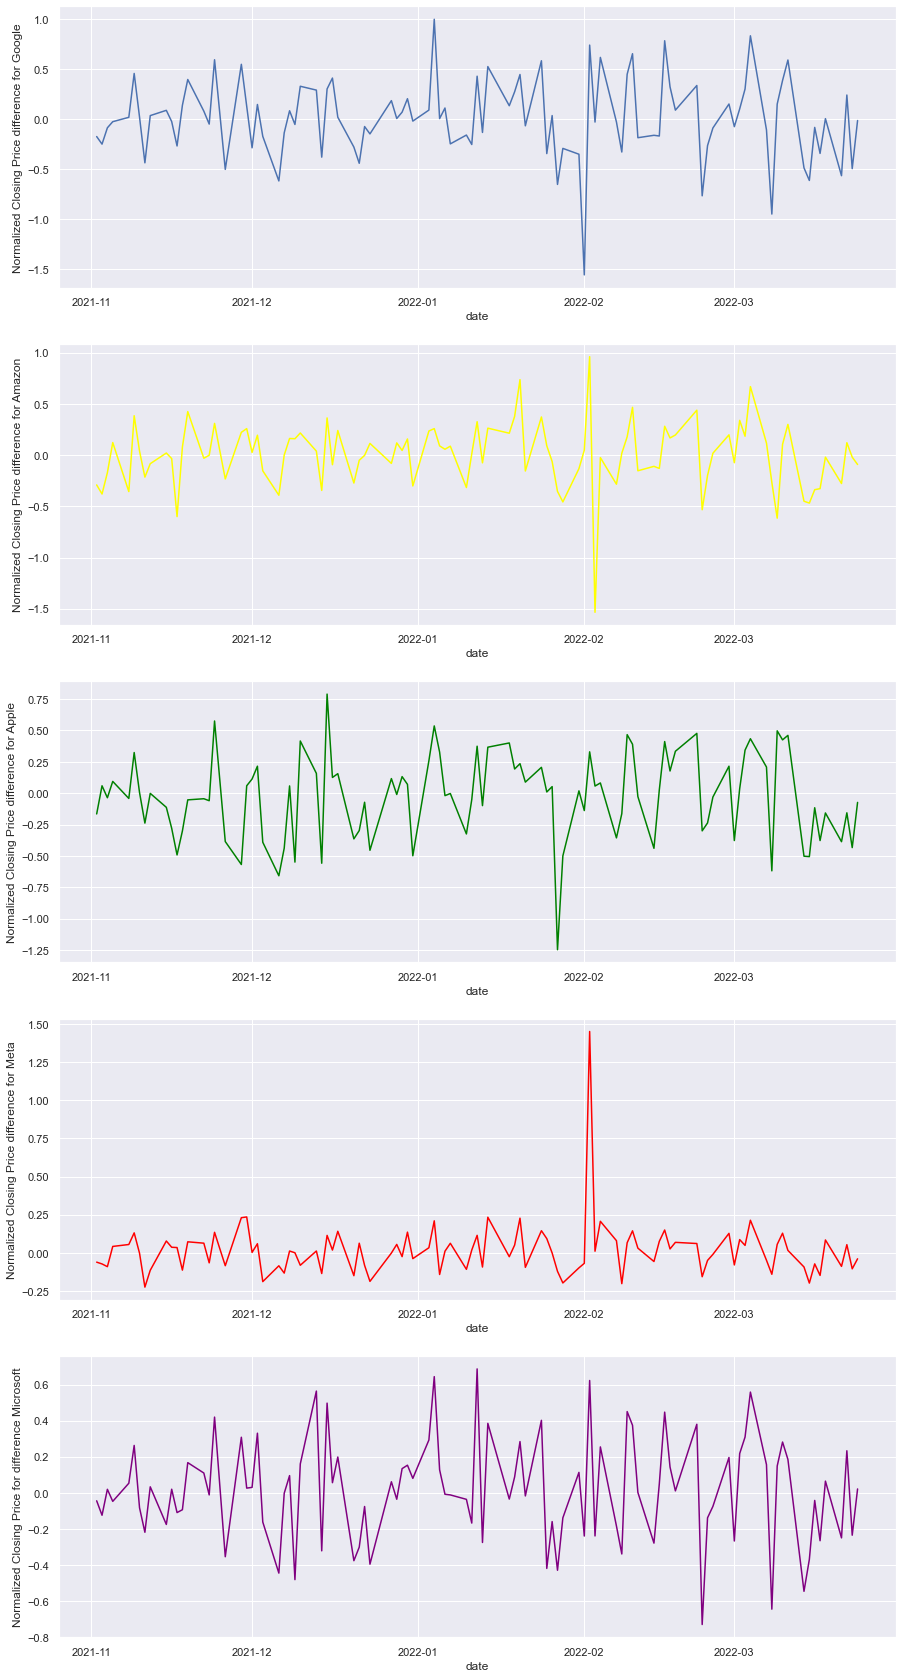

In [12]:
f, axes = plt.subplots(5,figsize=(15, 30))


#For Google
closeSeries2=closeSeries2.diff()
axes[0].set_xlabel("date")
axes[0].set_ylabel("Normalized Closing Price difference for Google")
axes[0].plot(closeSeries2)

#For Amazon
closeSeries3=closeSeries3.diff()
axes[1].set_xlabel("date")
axes[1].set_ylabel("Normalized Closing Price difference for Amazon")
axes[1].plot(closeSeries3, color = "yellow")

#For Apple
closeSeries4=closeSeries4.diff()
axes[2].set_xlabel("date")
axes[2].set_ylabel("Normalized Closing Price difference for Apple")
axes[2].plot(closeSeries4, color = "green")

#For Meta
closeSeries5=closeSeries5.diff()
axes[3].set_xlabel("date")
axes[3].set_ylabel("Normalized Closing Price difference for Meta")
axes[3].plot(closeSeries5, color = "red")

#For Microsoft
closeSeries6=closeSeries6.diff()
axes[4].set_xlabel("date")
axes[4].set_ylabel("Normalized Closing Price for difference Microsoft")
axes[4].plot(closeSeries6, color = "purple")

## Volume

### Below we will plot the volume of all the companies in one graph. We will also show the lag-1 difference for each company.

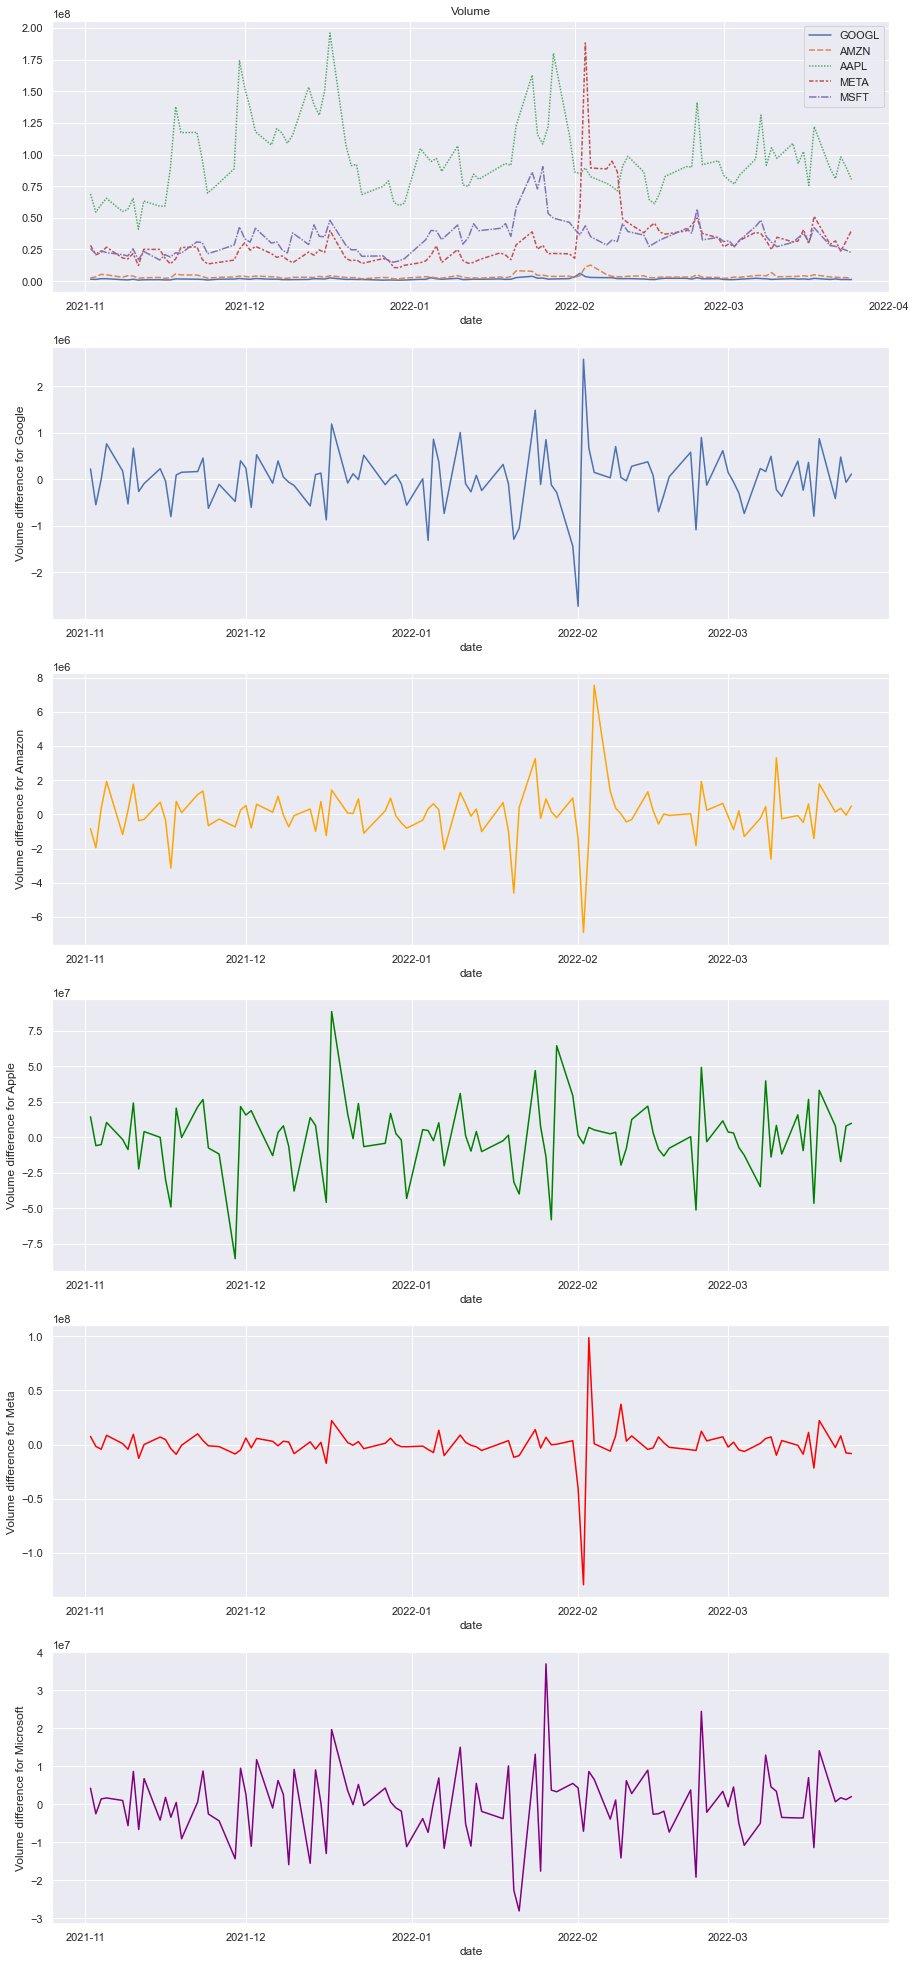

In [13]:
# Draw the distributions of all variables
f, axes = plt.subplots(6,figsize=(15, 35))

p1 = sb.lineplot(data=jointVolumeDF, ax=axes[0])
p1.set_title("Volume")



#For Google
copy=jointVolumeDF.copy()
copy.drop(["AMZN","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[1].set_xlabel("date")
axes[1].set_ylabel("Volume difference for Google")
axes[1].plot(diff)


#For Amazon
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[2].set_xlabel("date")
axes[2].set_ylabel("Volume difference for Amazon")
axes[2].plot(diff,color = "orange")


#For Apple
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[3].set_xlabel("date")
axes[3].set_ylabel("Volume difference for Apple")
axes[3].plot(diff,color = "green")


#For Meta
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[4].set_xlabel("date")
axes[4].set_ylabel("Volume difference for Meta")
axes[4].plot(diff,color = "red")


#For Microsoft
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","META"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
diff = series.diff()
axes[5].set_xlabel("date")
axes[5].set_ylabel("Volume difference for Microsoft")
axes[5].plot(diff,color = "purple")


### Heatmap

          GOOGL      AMZN      AAPL      META      MSFT
GOOGL  1.000000  0.552547  0.288963  0.541098  0.560679
AMZN   0.552547  1.000000  0.245669  0.622394  0.394991
AAPL   0.288963  0.245669  1.000000 -0.009475  0.538984
META   0.541098  0.622394 -0.009475  1.000000  0.202010
MSFT   0.560679  0.394991  0.538984  0.202010  1.000000


<AxesSubplot:>

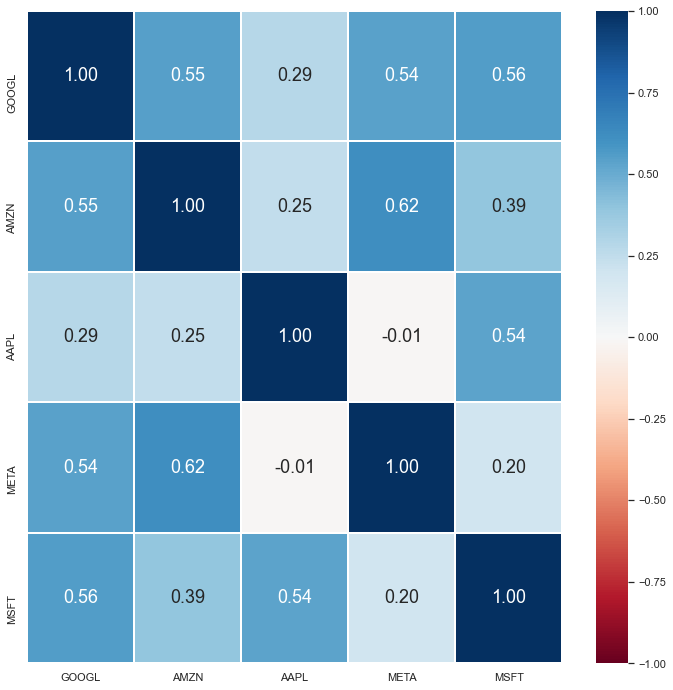

In [14]:
# Correlation Matrix
print(jointVolumeDF.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointVolumeDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As seen here, each volume stock have low to medium correlations to one another. </p>

apple has one of the lowest correlations in the heatmap, -0.01 with meta, 0.25 with amazon and 0.29 with google.</p>
meta have the highest correlation of 0.62 with amazon, but also a low correlation of 0.2 with microsoft</p>
There are still many medium correlations that can be used to predict the different stock volumes, such as the one between meta and amazon (0.62), apple and microsoft (0.54)

Google has medium correlation with amazon (0.55), meta (0.54) and microsoft (0.56) and low correlation with apple (0.29). A similar relationship with that of the close price

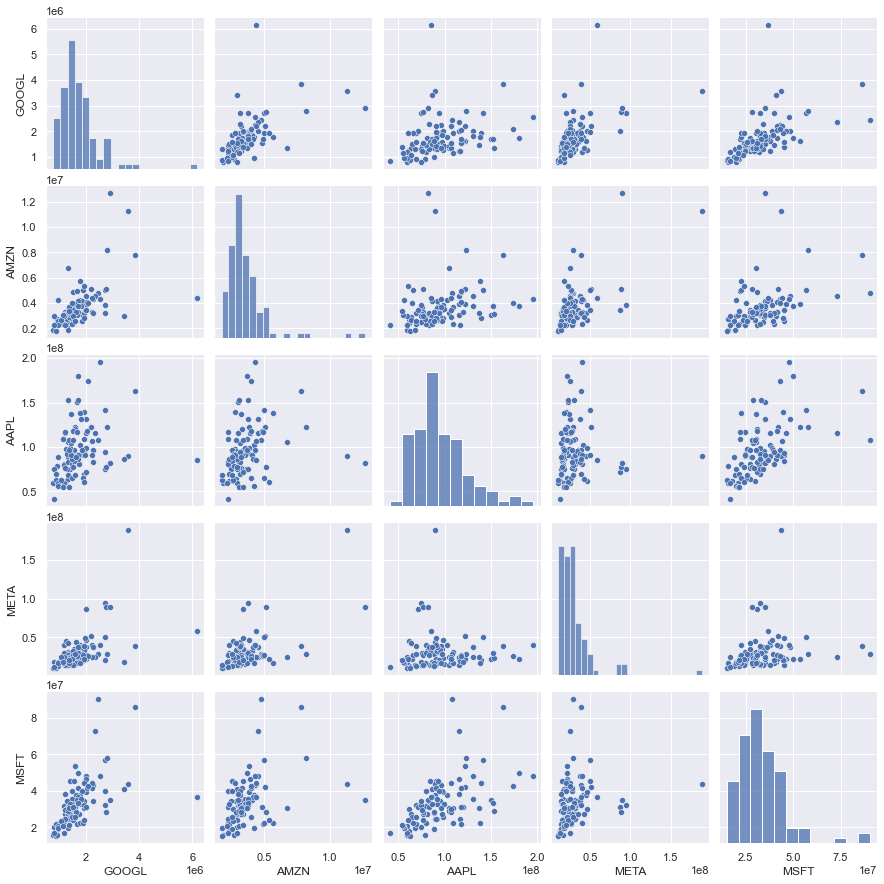

In [15]:
sb.pairplot(data = jointVolumeDF)

The jointplot supports the heatmap as there is no obvious correlation between any two companies unlike for the closing price.

### For better visualization, we will normalize the data

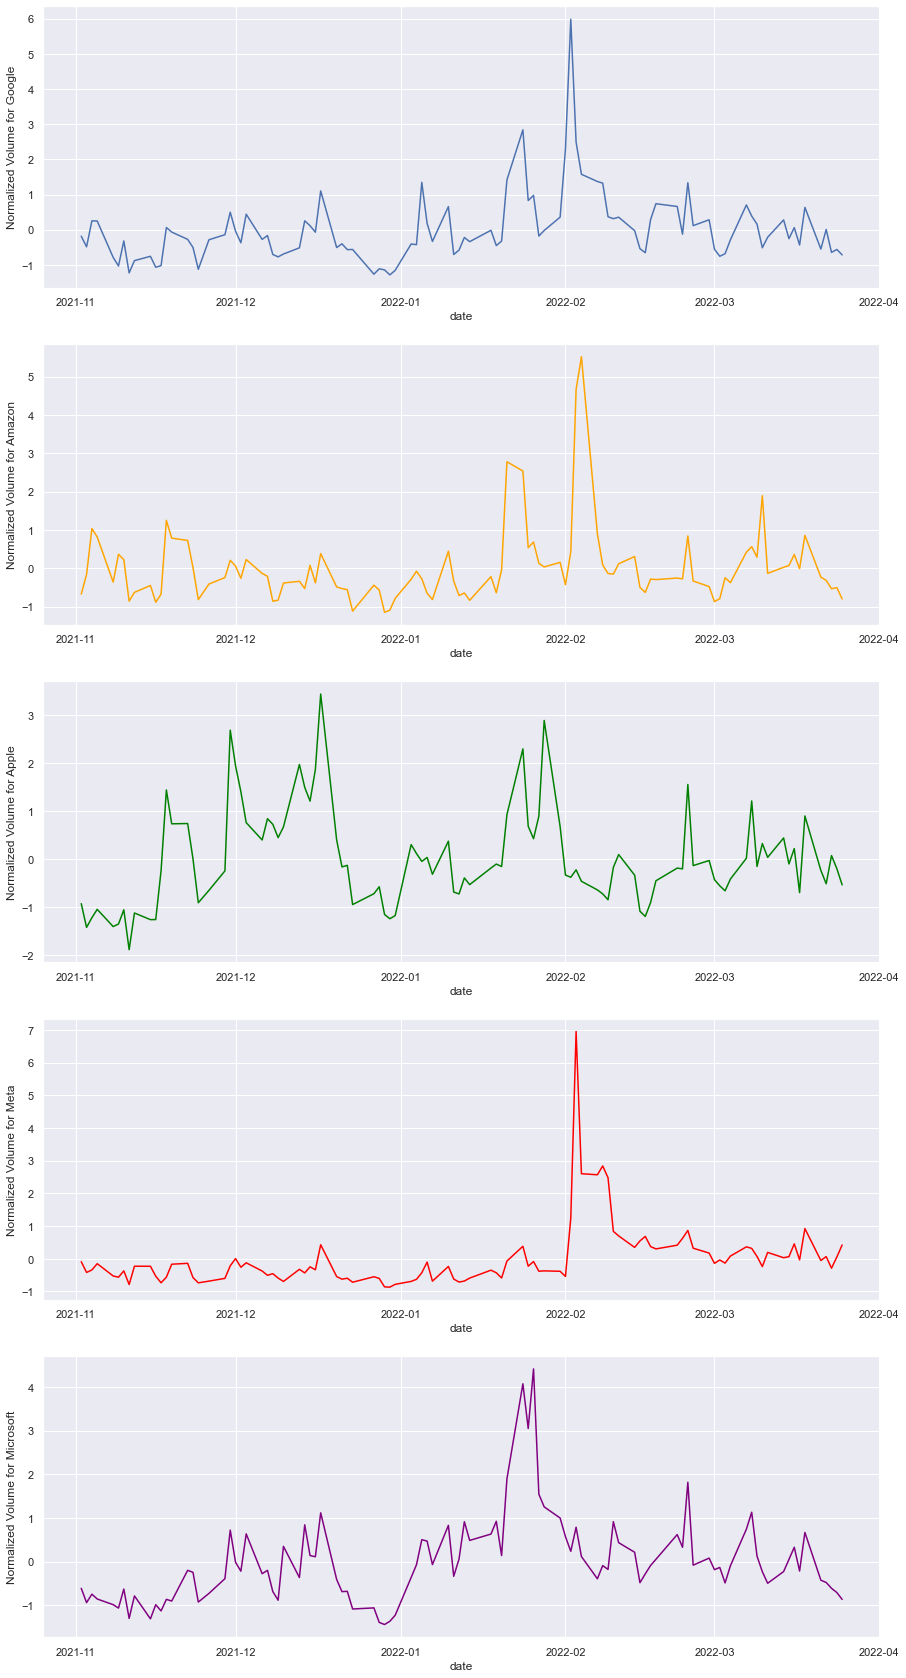

In [16]:
f, axes = plt.subplots(5,figsize=(15, 30))



#For Google
copy=jointVolumeDF.copy()
copy.drop(["AMZN","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries2 = (series - avg) / dev
axes[0].set_xlabel("date")
axes[0].set_ylabel("Normalized Volume for Google")
axes[0].plot(closeSeries2)


#For Amazon
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AAPL","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries3 = (series - avg) / dev
axes[1].set_xlabel("date")
axes[1].set_ylabel("Normalized Volume for Amazon")
axes[1].plot(closeSeries3,color = "orange")


#For Apple
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","META","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries4 = (series - avg) / dev
axes[2].set_xlabel("date")
axes[2].set_ylabel("Normalized Volume for Apple")
axes[2].plot(closeSeries4,color = "green")


#For Meta
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","MSFT"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries5 = (series - avg) / dev
axes[3].set_xlabel("date")
axes[3].set_ylabel("Normalized Volume for Meta")
axes[3].plot(closeSeries5,color = "red")


#For Microsoft
copy=jointVolumeDF.copy()
copy.drop(["GOOGL","AMZN","AAPL","META"], axis=1, inplace=True)
newCSV = copy
newCSV.to_csv('newCSV.csv')

series = pd.read_csv('newCSV.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
avg, dev = series.mean(), series.std()
closeSeries6 = (series - avg) / dev
axes[4].set_xlabel("date")
axes[4].set_ylabel("Normalized Volume for Microsoft")
axes[4].plot(closeSeries6,color = "purple")

To remove the stationarity we will now take the lag-1 difference of the normalized volume, note that the shape will be the same as the raw lag-1 volume, however this one is centered around zero at all times.

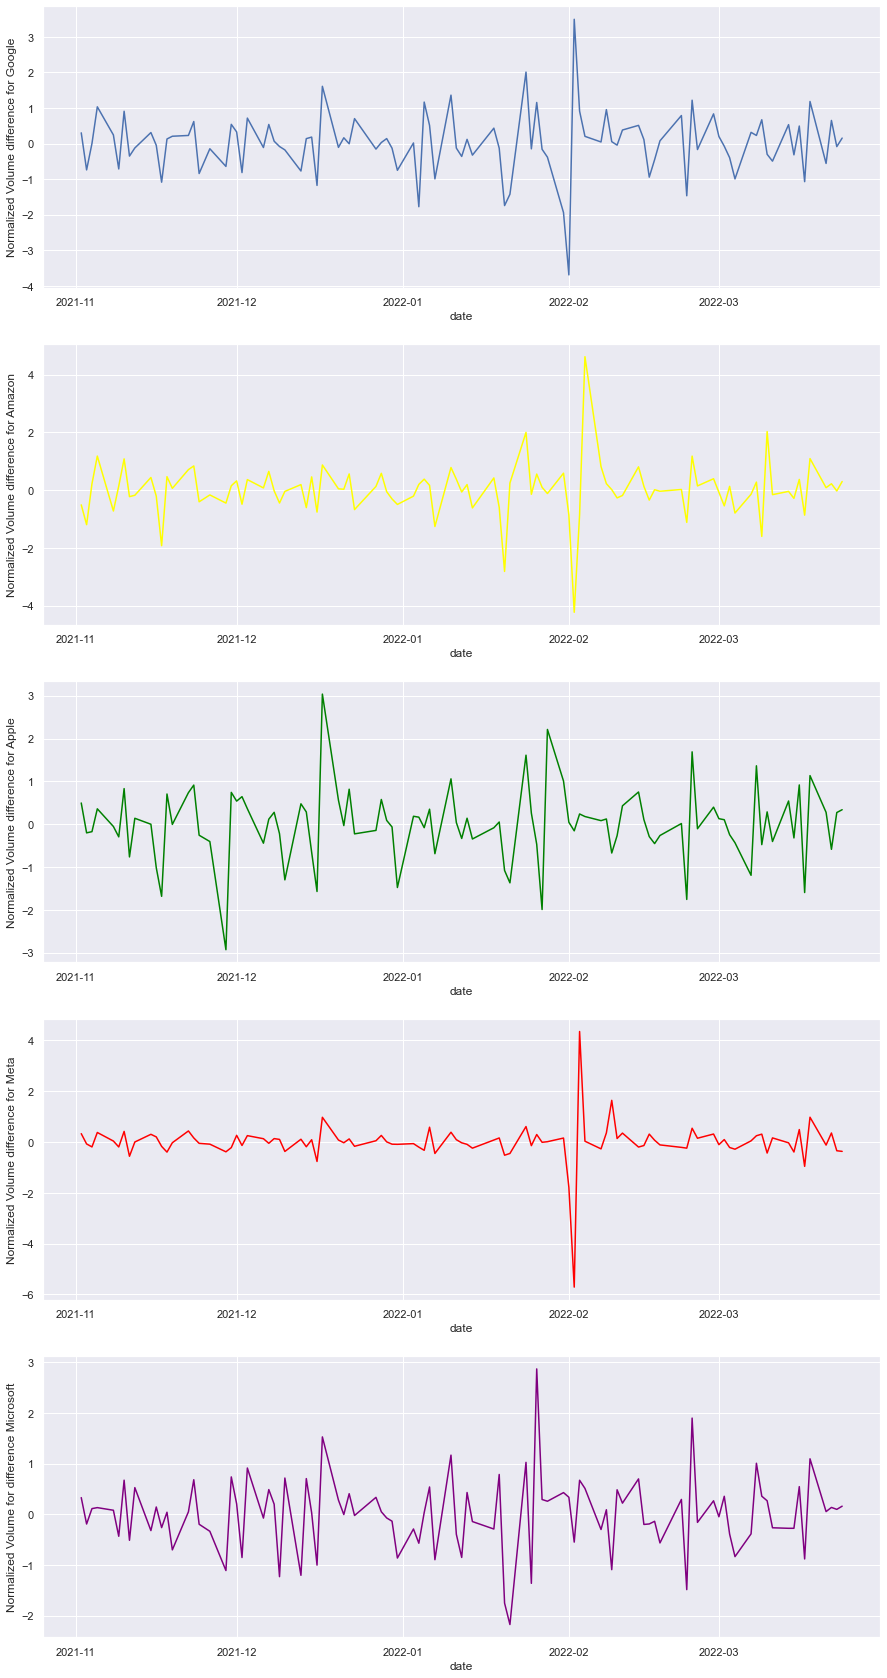

In [17]:
f, axes = plt.subplots(5,figsize=(15, 30))


#For Google
closeSeries2=closeSeries2.diff()
axes[0].set_xlabel("date")
axes[0].set_ylabel("Normalized Volume difference for Google")
axes[0].plot(closeSeries2)

#For Amazon
closeSeries3=closeSeries3.diff()
axes[1].set_xlabel("date")
axes[1].set_ylabel("Normalized Volume difference for Amazon")
axes[1].plot(closeSeries3, color = "yellow")

#For Apple
closeSeries4=closeSeries4.diff()
axes[2].set_xlabel("date")
axes[2].set_ylabel("Normalized Volume difference for Apple")
axes[2].plot(closeSeries4, color = "green")

#For Meta
closeSeries5=closeSeries5.diff()
axes[3].set_xlabel("date")
axes[3].set_ylabel("Normalized Volume difference for Meta")
axes[3].plot(closeSeries5, color = "red")

#For Microsoft
closeSeries6=closeSeries6.diff()
axes[4].set_xlabel("date")
axes[4].set_ylabel("Normalized Volume for difference Microsoft")
axes[4].plot(closeSeries6, color = "purple")

### Stationarity

1. Partial Autocorrelation: from this plot, we found $p = 6$ for the model AR($p$). Parameter $p$ which represents the maximum lag. To find it, we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.
2. Autocorrelation: from this plot, we found $q = 6$ for the model MA($q$). Parameter $q$ which represents 
3. Dickey-Fuller test is often used to test if a time series is stationary. The null hypothesis of the test is that there exists a unit root. By checking Dickey-Fuller after each number of differences made, we check the required number of differences to make the series stationary. Therefore $d = 1$.

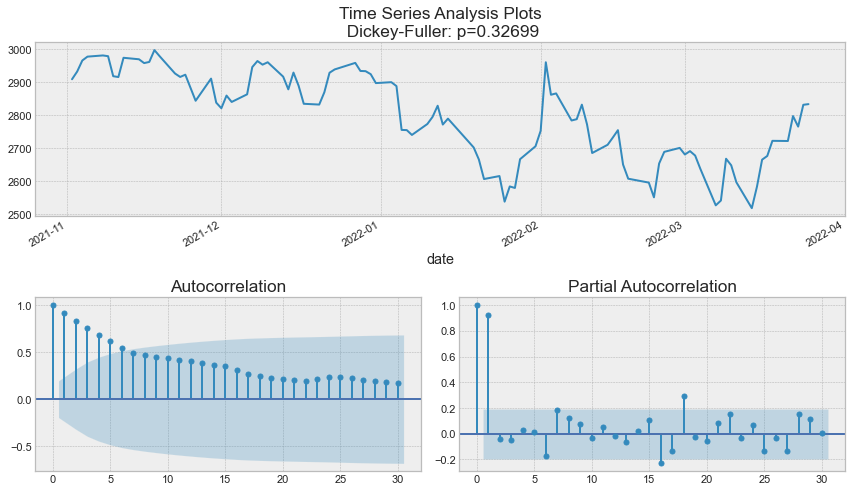

In [22]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(GOOGL['4. close'], lags=30)

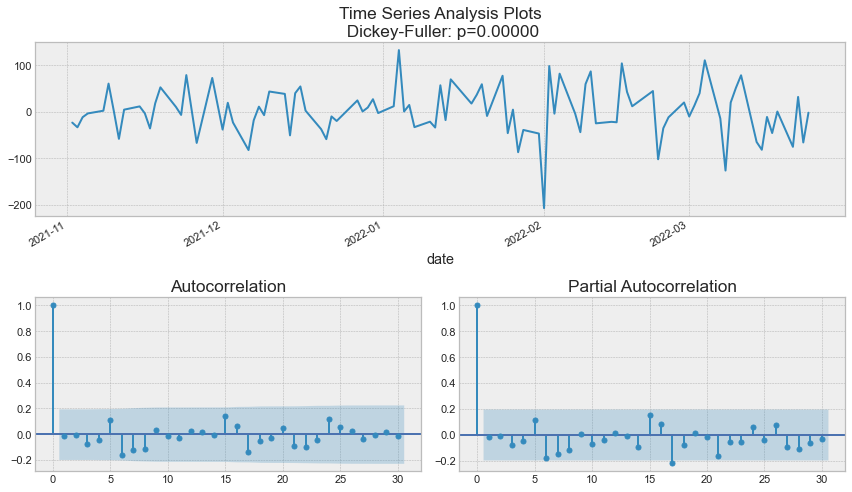

In [23]:
data_diff = GOOGL['4. close'] - GOOGL['4. close'].shift(1)

tsplot(data_diff[1:], lags=30)